In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import missingno as msno
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
plt.rcParams.update({'figure.max_open_warning': 0})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [5]:
data = pd.read_csv('./v4-init-29-7/oc2907.csv').drop(columns='Unnamed: 0')

# species removed due to records not spanning enough years (less than 25)

gb = data.groupby('Species')    
databyspecies = [gb.get_group(x) for x in gb.groups]

species_toditch = []
for i in range(len(databyspecies)):
    if databyspecies[i].Year.max()-databyspecies[i].Year.min()<25:
        species_toditch.append(' '.join(databyspecies[i].Species.unique()))
        
data = data[~data.Species.isin(species_toditch)]

gb = data.groupby('Species')    
databyspecies = [gb.get_group(x) for x in gb.groups]

In [6]:
data.Species.nunique()

72

In [7]:
data[['Latitude', 'Longitude']]

,Latitude,Longitude
0,-28.562943,153.343073
1,-29.627578,151.946924
2,-28.519591,153.352642
3,-29.949267,153.237874
4,-29.528935,152.268375
...,...,...
12735,-28.600000,153.216700
12737,-29.560438,153.155384
12738,-29.553127,153.155610
12739,-29.723018,153.118648


In [8]:
# data['lat_long_tuple'] = list(zip(data.Latitude, data.Longitude))

In [9]:
# data.lat_long_tuple[0:3]

# Used google maps elevation api to get elevation values - then exported as csv and reloaded data

In [10]:
# data = pd.read_csv('./data_elevation.csv').drop(columns='Unnamed: 0')

In [11]:
data

,Species,Latitude,Longitude,Coordinate Uncertainty in Metres,Year,Occurrence status,maxlat,minlat,record_count
0,Uromyrtus australis,-28.562943,153.343073,20.0,2017.0,present,-27.673600,-30.333333,302
1,Persoonia rufa,-29.627578,151.946924,100.0,1993.0,present,-28.770000,-30.337723,206
2,Uromyrtus australis,-28.519591,153.352642,20.0,2017.0,present,-27.673600,-30.333333,302
3,Macrozamia fawcettii,-29.949267,153.237874,100.0,1995.0,present,-28.465081,-30.534991,205
4,Eucalyptus codonocarpa,-29.528935,152.268375,100.0,1974.0,present,-28.200000,-30.440876,256
...,...,...,...,...,...,...,...,...,...
12735,Solanum acanthodapis,-28.600000,153.216700,1000.0,2000.0,present,-28.350000,-28.937631,41
12737,Angophora robur,-29.560438,153.155384,5.0,2014.0,present,-29.442845,-30.095105,1563
12738,Angophora robur,-29.553127,153.155610,5.0,2014.0,present,-29.442845,-30.095105,1563
12739,Angophora robur,-29.723018,153.118648,5.0,2014.0,present,-29.442845,-30.095105,1563


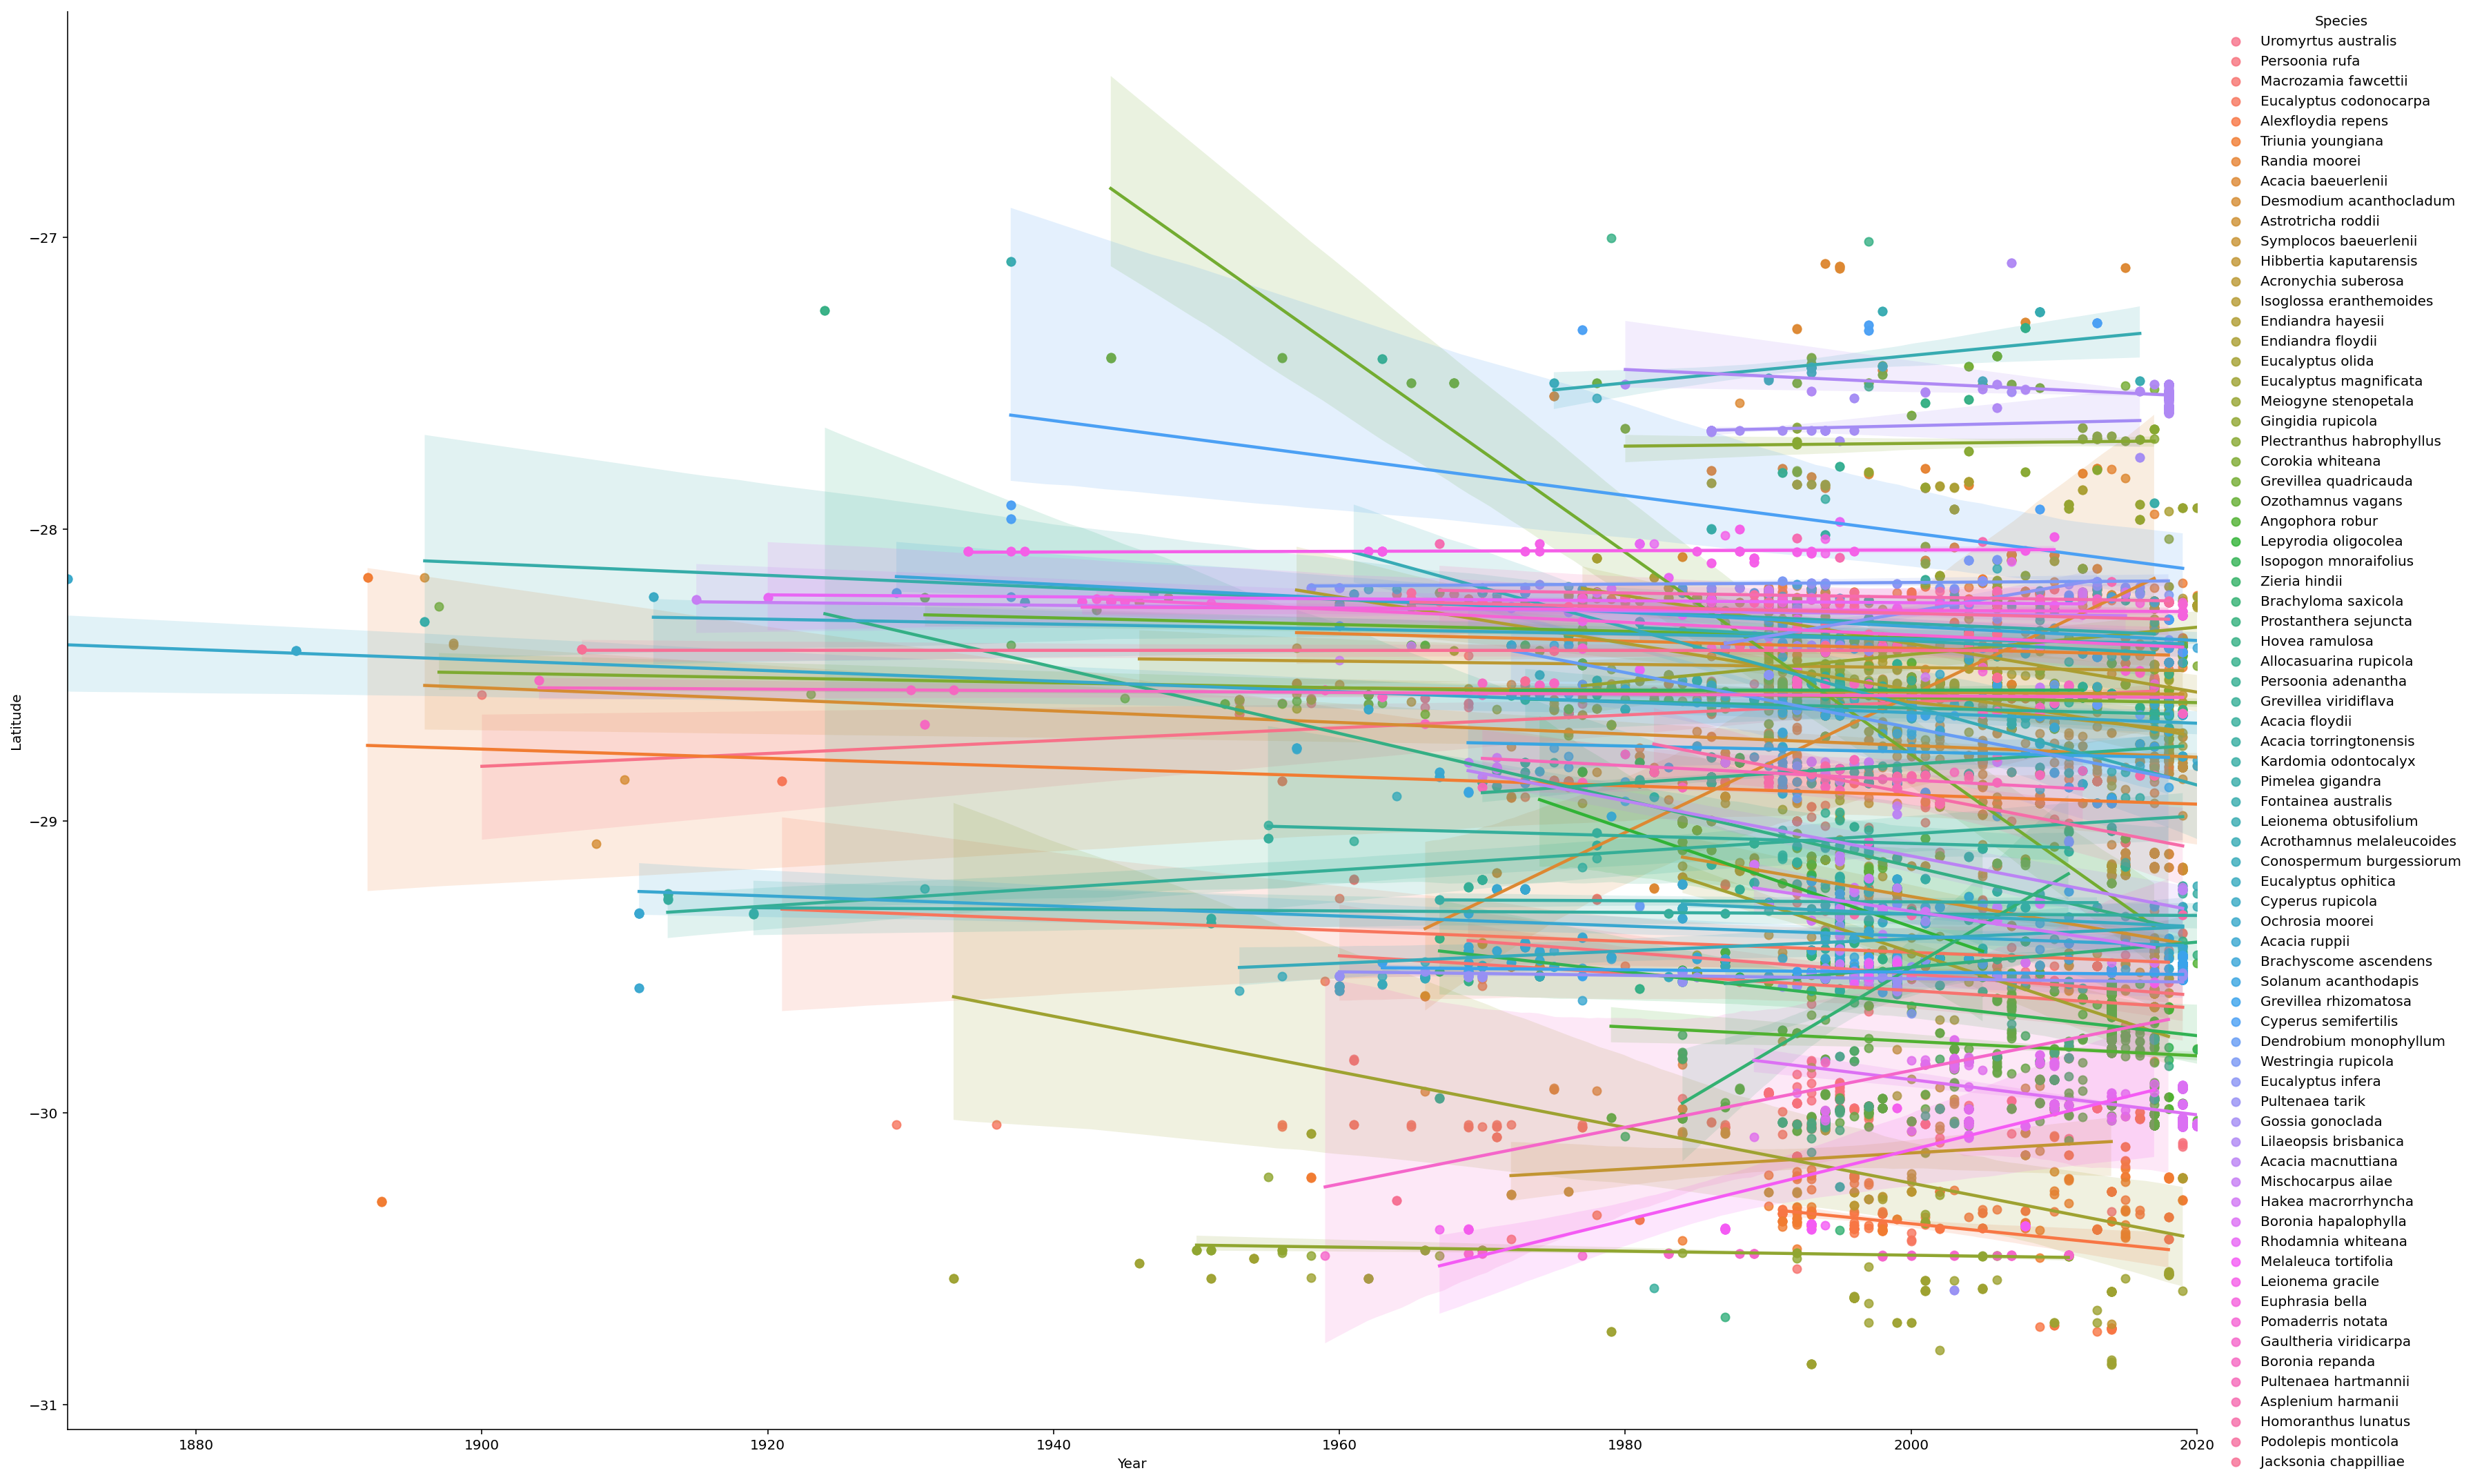

In [12]:
sns.lmplot(x="Year", y="Latitude", hue = "Species", data=data, height=15, aspect=1.5)

- holm-bonferroni
- are taller species less likely to change? ask questions about types of species that may be changing
- what families may be changing
- herbaceous vs woody
- canopy vs understorey
- write up hypotheses before writing up (or finding out about) results
- address limitations in methods not the discussion
- what clades of plants ar eparticularly likely to change
- plant height
- get rid of species with more than x years between records
- rainforest vs schlerophyll - vegetation map plantnet nsw
- set min year range for any individual species
- what kinds of species are moving and which are being left behind

In [13]:
gb = data.groupby('Species')    
databyspecies = [gb.get_group(x) for x in gb.groups]
databyspecies[0].head()

,Species,Latitude,Longitude,Coordinate Uncertainty in Metres,Year,Occurrence status,maxlat,minlat,record_count
12,Acacia baeuerlenii,-29.176700,153.280300,200.0,1971.0,present,-27.081875,-30.200636,79
262,Acacia baeuerlenii,-29.497368,153.220613,1000.0,2011.0,present,-27.081875,-30.200636,79
306,Acacia baeuerlenii,-29.500000,153.250000,1000.0,1974.0,present,-27.081875,-30.200636,79
370,Acacia baeuerlenii,-29.498411,153.251075,1000.0,1974.0,present,-27.081875,-30.200636,79
505,Acacia baeuerlenii,-29.361253,153.076288,100.0,1997.0,present,-27.081875,-30.200636,79


In [14]:
# OLS regression results

names = []
p = []
coefs_intercept = []
coefs_year = []
for i in range(len(data['Species'].unique())):
    results = smf.ols('Latitude ~ Year', data=databyspecies[i]).fit()
    p.append(results.pvalues)
    coefs_intercept.append(results.params[0])
    coefs_year.append(results.params[1])
    names.append(databyspecies[i].Species.unique().item())
    print(databyspecies[i]['Species'].unique(), results.summary())

['Acacia baeuerlenii']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     10.30
Date:                Thu, 15 Oct 2020   Prob (F-statistic):            0.00194
Time:                        20:33:22   Log-Likelihood:                -109.21
No. Observations:                  79   AIC:                             222.4
Df Residuals:                      77   BIC:                             227.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.6147     14.

['Allocasuarina rupicola']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     21.63
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           9.93e-06
Time:                        20:33:22   Log-Likelihood:                 111.29
No. Observations:                 104   AIC:                            -218.6
Df Residuals:                     102   BIC:                            -213.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.3155    

['Cyperus semifertilis']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     6.399
Date:                Thu, 15 Oct 2020   Prob (F-statistic):             0.0152
Time:                        20:33:22   Log-Likelihood:                -21.381
No. Observations:                  45   AIC:                             46.76
Df Residuals:                      43   BIC:                             50.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2073      

['Grevillea quadricauda']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     83.31
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           3.42e-16
Time:                        20:33:23   Log-Likelihood:                -177.96
No. Observations:                 158   AIC:                             359.9
Df Residuals:                     156   BIC:                             366.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5035     

['Macrozamia fawcettii']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.341
Date:                Thu, 15 Oct 2020   Prob (F-statistic):              0.248
Time:                        20:33:23   Log-Likelihood:                -118.84
No. Observations:                 205   AIC:                             241.7
Df Residuals:                     203   BIC:                             248.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.6090      

['Randia moorei']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.480
Date:                Thu, 15 Oct 2020   Prob (F-statistic):              0.224
Time:                        20:33:23   Log-Likelihood:                 102.93
No. Observations:                 468   AIC:                            -201.9
Df Residuals:                     466   BIC:                            -193.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.8888      2.075  

In [15]:
# make params dataframe with species, p values at intercept and year, and coefs at intercept and year
params = pd.DataFrame(p)
params.insert(0, 'Species', names)
params['coefs_intercept'] = coefs_intercept
params['coefs_year'] = coefs_year

In [16]:
params

,Species,Intercept,Year,coefs_intercept,coefs_year
0,Acacia baeuerlenii,1.669236e-06,1.941063e-03,-75.614719,0.023523
1,Acacia floydii,4.407802e-04,7.132008e-01,-26.454829,-0.001311
2,Acacia macnuttiana,3.774612e-03,3.868752e-07,-10.243217,-0.009438
3,Acacia ruppii,4.717432e-69,1.292674e-03,-25.963158,-0.001716
4,Acacia torringtonensis,1.134598e-23,8.075658e-01,-28.793402,-0.000263
...,...,...,...,...,...
67,Symplocos baeuerlenii,2.657964e-162,3.049807e-01,-27.831191,-0.000364
68,Triunia youngiana,1.046196e-09,4.476045e-01,-25.766905,-0.001572
69,Uromyrtus australis,1.188832e-73,1.175789e-03,-32.995809,0.002202
70,Westringia rupicola,3.314607e-34,3.259310e-01,-28.755279,0.000286


# Attention Eve :)
# Get coefficients and p values for quantreg lines

In [17]:
from rpy2.robjects.vectors import DataFrame
from rpy2.robjects.packages import importr, data

# import base r
r_base = importr('base') 

# import R's utility package
utils = importr('utils')

# select a mirror for R packages and package installation (run on first use)

# utils.chooseCRANmirror(ind=1) # select the first mirror in the list
# utils.install_packages('quantreg')

# import quantreg package
quantreg = importr('quantreg')

import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

anova = quantreg.anova_rq
summ = quantreg.summary_rq
# p5 = []
# p95 = []
# coefs5 = []
# coefs95 = []
# coefs5_intercept = []
# coefs95_intercept = []

# ######################################################## SE choice here ###############################################################

# se='rank'

# ######################################################## SE choice here ###############################################################
# # nid 

# # for i in range(len(databyspecies)):
    
# species = databyspecies[0]

# with localconverter(ro.default_converter + pandas2ri.converter):
#     r_df = ro.conversion.py2rpy(species)

# model5 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.05)
# model95 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.95)
# summ = quantreg.summary_rq
    
# print(summ(model5, se=se, iid=False)[2])
#     p5.append(summ(model5, se=se)[2][7])
#     p95.append(summ(model95, se=se)[2][7])
#     coefs5.append(summ(model5, se=se)[2][1])
#     coefs95.append(summ(model95, se=se)[2][1])
#     coefs5_intercept.append(summ(model5, se=se)[2][0])
#     coefs95_intercept.append(summ(model95, se=se)[2][0])

# params['p5'] = p5
# params['p95'] = p95
# params['coefs5'] = coefs5
# params['coefs95'] = coefs95
# params['coefs5_intercept'] = coefs5_intercept
# params['coefs95_intercept'] = coefs95_intercept

In [18]:
se='boot'
summ = quantreg.summary_rq

p_val_anova = []
coefs5_intercept = []
coefs95_intercept = []
coefs5 = []
coefs95 = []
p5 = []
p95 = []

for i in range(len(databyspecies)):
    species = databyspecies[i]

    # convert pandas dataframe to r dataframe - 'r_df'
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_df = ro.conversion.py2rpy(species)

    # fit models
    model5 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.05)
    model95 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.95)
    
    p5.append(summ(model5, se=se)[2][7])
    p95.append(summ(model95, se=se)[2][7])
    coefs5_intercept.append(model5[0][0])
    coefs95_intercept.append(model95[0][0])
    coefs5.append(model5[0][1])
    coefs95.append(model95[0][1])

    T = anova(model5, model95, se='ker')[0][2][0]

    boot = 1000
    T_star = []

    for x in range(0, boot):

        # permutation
        random.shuffle(species.Latitude.values)
#         random.shuffle(species.elevation.values)
        
        with localconverter(ro.default_converter + pandas2ri.converter):
            r_df = ro.conversion.py2rpy(species)
            
        # fit models with quantreg
        model5 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.05)
        model95 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.95)

        # add to T_star (list of values)
        T_star.append(anova(model5, model95, se='ker')[0][2][0])

    p_val_anova.append((len(np.where(np.array(T_star)>T)[0])+1)/((len(T_star))+1))
    

In [19]:
for item in p_val_anova:
    if item < 0.05:
        print(item)

0.000999000999000999
0.000999000999000999
0.027972027972027972
0.000999000999000999
0.000999000999000999
0.000999000999000999
0.000999000999000999
0.000999000999000999
0.000999000999000999
0.04395604395604396
0.004995004995004995
0.000999000999000999
0.002997002997002997
0.004995004995004995
0.001998001998001998
0.001998001998001998
0.003996003996003996
0.002997002997002997
0.003996003996003996
0.00999000999000999
0.000999000999000999
0.04395604395604396
0.002997002997002997
0.000999000999000999
0.000999000999000999
0.012987012987012988
0.01098901098901099
0.00999000999000999
0.005994005994005994


In [20]:
params['p5'] = p5
params['p95'] = p95
params['coefs5'] = coefs5
params['coefs95'] = coefs95
params['coefs5_intercept'] = coefs5_intercept
params['coefs95_intercept'] = coefs95_intercept
params['p_val_anova'] = p_val_anova

In [21]:
params

,Species,Intercept,Year,coefs_intercept,coefs_year,p5,p95,coefs5,coefs95,coefs5_intercept,coefs95_intercept,p_val_anova
0,Acacia baeuerlenii,1.669236e-06,1.941063e-03,-75.614719,0.023523,0.525461,0.317226,-0.002738,0.022170,-24.544339,-71.329150,0.000999
1,Acacia floydii,4.407802e-04,7.132008e-01,-26.454829,-0.001311,0.943484,0.044596,0.001625,-0.044168,-32.378700,59.717648,0.325674
2,Acacia macnuttiana,3.774612e-03,3.868752e-07,-10.243217,-0.009438,0.000143,0.057263,-0.023600,-0.000453,17.642000,-27.889496,0.000999
3,Acacia ruppii,4.717432e-69,1.292674e-03,-25.963158,-0.001716,0.124922,0.923848,0.000617,0.000358,-30.749917,-29.554552,0.919081
4,Acacia torringtonensis,1.134598e-23,8.075658e-01,-28.793402,-0.000263,0.495730,0.415366,-0.002527,0.005198,-24.540838,-39.219218,0.027972
...,...,...,...,...,...,...,...,...,...,...,...,...
67,Symplocos baeuerlenii,2.657964e-162,3.049807e-01,-27.831191,-0.000364,0.261530,0.974917,0.000277,-0.000121,-29.187854,-28.000432,0.361638
68,Triunia youngiana,1.046196e-09,4.476045e-01,-25.766905,-0.001572,0.250491,0.038463,-0.000520,-0.000463,-29.336580,-27.290463,0.741259
69,Uromyrtus australis,1.188832e-73,1.175789e-03,-32.995809,0.002202,0.933493,0.497337,0.000979,0.000109,-30.567380,-28.735216,0.010989
70,Westringia rupicola,3.314607e-34,3.259310e-01,-28.755279,0.000286,0.002565,0.000000,-0.000374,0.002042,-27.468841,-32.197861,0.009990


# Holm adjustment

In [22]:
from statsmodels.stats.multitest import multipletests

# for every species, apply holm bonferroni adjustment for p values from ols, p5 and p95
# add adjusted p values to dataframe 'params'

holm_adjust_ols = multipletests(params.Year, method='holm')[1]
holm_adjust_5 = multipletests(params.p5, method='holm')[1]
holm_adjust_95 = multipletests(params.p95, method='holm')[1]
holm_adjust_anova = multipletests(params.p_val_anova, method='holm')[1]

params['holm_adjust_ols'] = holm_adjust_ols
params['holm_adjust_5'] = holm_adjust_5
params['holm_adjust_95'] = holm_adjust_95
params['holm_adjust_anova'] = holm_adjust_anova

# Attention Eve :)
# Significance of 5th and 95th percentile lines change after holm adjustment depending on which se is used

In [23]:
# 18 species significant after holm adjustment
holm_sig = params[params.holm_adjust_ols <0.05]
len(holm_sig)

18

In [24]:
# 5th percentile sig after holm adjust
holm_sig5 = params[params.holm_adjust_5 <0.05]
len(holm_sig5)

7

In [25]:
# 95th percentile sig after holm adjust
holm_sig95 = params[params.holm_adjust_95 <0.05]
len(holm_sig95)

10

In [26]:
# anova sig after holm adjust
holm_anova = params[params.holm_adjust_anova <0.05]
len(holm_anova)

0

In [27]:
# 38 species with significant movement before holm ajustment (out of 72)
sig = params[(params.Year<0.05)]
len(sig)

38

In [28]:
sig5 = params[(params.p5<0.05)]
len(sig5)

19

In [29]:
sig95 = params[(params.p95<0.05)]
len(sig95)

26

In [30]:
sig_anova = params[(params.p_val_anova<0.05)]
len(sig_anova)

29

In [31]:
sig

,Species,Intercept,Year,coefs_intercept,coefs_year,p5,p95,coefs5,coefs95,coefs5_intercept,coefs95_intercept,p_val_anova,holm_adjust_ols,holm_adjust_5,holm_adjust_95,holm_adjust_anova
0,Acacia baeuerlenii,1.669236e-06,1.941063e-03,-75.614719,0.023523,5.254609e-01,3.172265e-01,-0.002738,0.022170,-24.544339,-71.329150,0.000999,9.705316e-02,1.000000e+00,1.000000e+00,0.071928
2,Acacia macnuttiana,3.774612e-03,3.868752e-07,-10.243217,-0.009438,1.434384e-04,5.726342e-02,-0.023600,-0.000453,17.642000,-27.889496,0.000999,2.514689e-05,9.466933e-03,1.000000e+00,0.071928
3,Acacia ruppii,4.717432e-69,1.292674e-03,-25.963158,-0.001716,1.249223e-01,9.238481e-01,0.000617,0.000358,-30.749917,-29.554552,0.919081,6.721906e-02,1.000000e+00,1.000000e+00,1.000000
6,Acrothamnus melaleucoides,7.847919e-01,5.645068e-05,-1.570530,-0.013518,5.316381e-10,7.967170e-01,-0.022115,-0.000396,15.144778,-27.414314,0.000999,3.443492e-03,3.721466e-08,1.000000e+00,0.071928
7,Alexfloydia repens,6.764177e-10,1.382541e-03,-20.510832,-0.004935,0.000000e+00,9.065293e-01,-0.018085,0.000154,5.656853,-30.579125,0.000999,7.050961e-02,0.000000e+00,1.000000e+00,0.071928
8,Allocasuarina rupicola,9.193732e-46,9.929864e-06,-35.315487,0.003255,7.997716e-01,6.476795e-10,0.000369,0.005186,-29.609472,-39.032197,0.000999,6.255814e-04,1.000000e+00,4.209917e-08,0.071928
9,Angophora robur,1.541504e-55,1.103120e-03,-24.821247,-0.002467,2.772584e-03,0.000000e+00,-0.000669,-0.005028,-28.691023,-19.427469,0.000999,5.956846e-02,1.719002e-01,0.000000e+00,0.071928
11,Astrotricha roddii,1.412668e-09,3.616456e-16,-12.382730,-0.008438,1.724334e-03,4.440892e-16,-0.002337,-0.023191,-24.923026,17.665658,0.000999,2.531519e-14,1.120817e-01,2.975398e-14,0.071928
12,Boronia hapalophylla,1.672026e-64,5.965630e-35,-17.838652,-0.006024,1.632403e-01,0.000000e+00,0.001158,-0.008482,-32.384336,-12.782128,0.000999,4.295253e-33,1.000000e+00,0.000000e+00,0.071928
14,Brachyloma saxicola,3.249219e-07,5.100012e-04,-87.712321,0.029106,8.297415e-01,4.180963e-01,0.001587,0.012598,-33.213474,-54.364994,0.254745,2.856007e-02,1.000000e+00,1.000000e+00,1.000000


In [32]:
# mean OLS coefs (degrees of lat) multiplied by 111000m (111km is 1 degree of lat) to get the amount in meters that 
# the average species on this list is moving. 
############### NOTE this includes species which are NOT SIGNIFICANTLY MOVING, see below for sig moving species ###########################

params.coefs_year.mean()*111000

-194.36635251758307

In [33]:
sig.coefs_year.mean()*111000

-350.72773725123034

In [34]:
# these species are moving toward the equator

print(sig[sig.coefs_year > 0].Species)
print(len(sig[sig.coefs_year > 0].Species))
print('_____________________________________________________________________________________')
print('The above species are moving toward the equator at approximately ', sig[sig.coefs_year > 0].coefs_year.mean()*111000 , ' meters per year')

0         Acacia baeuerlenii
8     Allocasuarina rupicola
14       Brachyloma saxicola
25         Eucalyptus infera
36     Grevillea viridiflava
46     Leionema obtusifolium
50      Meiogyne stenopetala
51      Melaleuca tortifolia
69       Uromyrtus australis
Name: Species, dtype: object
9
_____________________________________________________________________________________
The above species are moving toward the equator at approximately  1122.2859950644913  meters per year


In [35]:
equator = sig[sig.coefs_year > 0]

In [36]:
# species moving toward equator that are significant after holm adjustment
equator[equator.holm_adjust_ols<0.05]

,Species,Intercept,Year,coefs_intercept,coefs_year,p5,p95,coefs5,coefs95,coefs5_intercept,coefs95_intercept,p_val_anova,holm_adjust_ols,holm_adjust_5,holm_adjust_95,holm_adjust_anova
8,Allocasuarina rupicola,9.193732e-46,9.929864e-06,-35.315487,0.003255,0.799772,6.476795e-10,0.000369,0.005186,-29.609472,-39.032197,0.000999,6.255814e-04,1.0,4.209917e-08,0.071928
14,Brachyloma saxicola,3.249219e-07,5.100012e-04,-87.712321,0.029106,0.829741,4.180963e-01,0.001587,0.012598,-33.213474,-54.364994,0.254745,2.856007e-02,1.0,1.000000e+00,1.000000
25,Eucalyptus infera,3.253546e-30,1.201911e-08,-45.061980,0.008389,0.063334,1.586510e-01,0.005875,0.000577,-40.191895,-29.333451,0.002997,7.932614e-07,1.0,1.000000e+00,0.173826


In [79]:
# these species are moving toward the south pole

print(sig[sig.coefs_year < 0].Species)
print(len(sig[sig.coefs_year < 0].Species))
print('_____________________________________________________________________________________')
print('The above species are moving toward the south pole at approximately ', abs(sig[sig.coefs_year < 0].coefs_year.mean()*111000) , ' meters per year')

2            Acacia macnuttiana
3                 Acacia ruppii
6     Acrothamnus melaleucoides
7            Alexfloydia repens
9               Angophora robur
11           Astrotricha roddii
12         Boronia hapalophylla
15        Brachyscome ascendens
17             Corokia whiteana
19         Cyperus semifertilis
20       Dendrobium monophyllum
21      Desmodium acanthocladum
22            Endiandra floydii
23            Endiandra hayesii
26       Eucalyptus magnificata
27             Eucalyptus olida
28          Eucalyptus ophitica
34        Grevillea quadricauda
35        Grevillea rhizomatosa
37          Hakea macrorrhyncha
39          Homoranthus lunatus
40               Hovea ramulosa
41      Isoglossa eranthemoides
42        Isopogon mnoraifolius
47         Lepyrodia oligocolea
48        Lilaeopsis brisbanica
53              Ochrosia moorei
54            Ozothamnus vagans
56               Persoonia rufa
Name: Species, dtype: object
29
________________________________________

In [38]:
poleward = sig[sig.coefs_year < 0]
poleward

,Species,Intercept,Year,coefs_intercept,coefs_year,p5,p95,coefs5,coefs95,coefs5_intercept,coefs95_intercept,p_val_anova,holm_adjust_ols,holm_adjust_5,holm_adjust_95,holm_adjust_anova
2,Acacia macnuttiana,3.774612e-03,3.868752e-07,-10.243217,-0.009438,1.434384e-04,5.726342e-02,-0.023600,-0.000453,17.642000,-27.889496,0.000999,2.514689e-05,9.466933e-03,1.000000e+00,0.071928
3,Acacia ruppii,4.717432e-69,1.292674e-03,-25.963158,-0.001716,1.249223e-01,9.238481e-01,0.000617,0.000358,-30.749917,-29.554552,0.919081,6.721906e-02,1.000000e+00,1.000000e+00,1.000000
6,Acrothamnus melaleucoides,7.847919e-01,5.645068e-05,-1.570530,-0.013518,5.316381e-10,7.967170e-01,-0.022115,-0.000396,15.144778,-27.414314,0.000999,3.443492e-03,3.721466e-08,1.000000e+00,0.071928
7,Alexfloydia repens,6.764177e-10,1.382541e-03,-20.510832,-0.004935,0.000000e+00,9.065293e-01,-0.018085,0.000154,5.656853,-30.579125,0.000999,7.050961e-02,0.000000e+00,1.000000e+00,0.071928
9,Angophora robur,1.541504e-55,1.103120e-03,-24.821247,-0.002467,2.772584e-03,0.000000e+00,-0.000669,-0.005028,-28.691023,-19.427469,0.000999,5.956846e-02,1.719002e-01,0.000000e+00,0.071928
11,Astrotricha roddii,1.412668e-09,3.616456e-16,-12.382730,-0.008438,1.724334e-03,4.440892e-16,-0.002337,-0.023191,-24.923026,17.665658,0.000999,2.531519e-14,1.120817e-01,2.975398e-14,0.071928
12,Boronia hapalophylla,1.672026e-64,5.965630e-35,-17.838652,-0.006024,1.632403e-01,0.000000e+00,0.001158,-0.008482,-32.384336,-12.782128,0.000999,4.295253e-33,1.000000e+00,0.000000e+00,0.071928
15,Brachyscome ascendens,2.098759e-21,1.743372e-04,-23.517366,-0.002408,9.218827e-01,6.179659e-02,0.000100,-0.002080,-28.607369,-24.047268,0.043956,1.028590e-02,1.000000e+00,1.000000e+00,1.000000
17,Corokia whiteana,7.779795e-138,5.810665e-04,-26.879664,-0.000849,1.533022e-02,2.965982e-01,-0.000939,-0.002347,-26.765438,-23.813672,0.051948,3.195866e-02,9.198132e-01,1.000000e+00,1.000000
19,Cyperus semifertilis,4.518855e-03,1.516670e-02,-15.207295,-0.006403,9.008527e-11,9.814656e-01,-0.005549,0.000437,-17.217531,-28.173186,0.104895,6.066678e-01,6.396054e-09,1.000000e+00,1.000000


In [39]:
# species moving poleward that are significant after holm adjustment
len(poleward[poleward.holm_adjust_ols<0.05])

15

In [40]:
# contraction and expansion significance - percentile lines are significantly different
cont_exp_sig = params[params.p_val_anova<0.05]
len(cont_exp_sig)

29

In [41]:
cont_exp_sig

,Species,Intercept,Year,coefs_intercept,coefs_year,p5,p95,coefs5,coefs95,coefs5_intercept,coefs95_intercept,p_val_anova,holm_adjust_ols,holm_adjust_5,holm_adjust_95,holm_adjust_anova
0,Acacia baeuerlenii,1.669236e-06,1.941063e-03,-75.614719,0.023523,5.254609e-01,3.172265e-01,-0.002738,0.022170,-24.544339,-71.329150,0.000999,9.705316e-02,1.000000e+00,1.000000e+00,0.071928
2,Acacia macnuttiana,3.774612e-03,3.868752e-07,-10.243217,-0.009438,1.434384e-04,5.726342e-02,-0.023600,-0.000453,17.642000,-27.889496,0.000999,2.514689e-05,9.466933e-03,1.000000e+00,0.071928
4,Acacia torringtonensis,1.134598e-23,8.075658e-01,-28.793402,-0.000263,4.957305e-01,4.153660e-01,-0.002527,0.005198,-24.540838,-39.219218,0.027972,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
6,Acrothamnus melaleucoides,7.847919e-01,5.645068e-05,-1.570530,-0.013518,5.316381e-10,7.967170e-01,-0.022115,-0.000396,15.144778,-27.414314,0.000999,3.443492e-03,3.721466e-08,1.000000e+00,0.071928
7,Alexfloydia repens,6.764177e-10,1.382541e-03,-20.510832,-0.004935,0.000000e+00,9.065293e-01,-0.018085,0.000154,5.656853,-30.579125,0.000999,7.050961e-02,0.000000e+00,1.000000e+00,0.071928
8,Allocasuarina rupicola,9.193732e-46,9.929864e-06,-35.315487,0.003255,7.997716e-01,6.476795e-10,0.000369,0.005186,-29.609472,-39.032197,0.000999,6.255814e-04,1.000000e+00,4.209917e-08,0.071928
9,Angophora robur,1.541504e-55,1.103120e-03,-24.821247,-0.002467,2.772584e-03,0.000000e+00,-0.000669,-0.005028,-28.691023,-19.427469,0.000999,5.956846e-02,1.719002e-01,0.000000e+00,0.071928
11,Astrotricha roddii,1.412668e-09,3.616456e-16,-12.382730,-0.008438,1.724334e-03,4.440892e-16,-0.002337,-0.023191,-24.923026,17.665658,0.000999,2.531519e-14,1.120817e-01,2.975398e-14,0.071928
12,Boronia hapalophylla,1.672026e-64,5.965630e-35,-17.838652,-0.006024,1.632403e-01,0.000000e+00,0.001158,-0.008482,-32.384336,-12.782128,0.000999,4.295253e-33,1.000000e+00,0.000000e+00,0.071928
15,Brachyscome ascendens,2.098759e-21,1.743372e-04,-23.517366,-0.002408,9.218827e-01,6.179659e-02,0.000100,-0.002080,-28.607369,-24.047268,0.043956,1.028590e-02,1.000000e+00,1.000000e+00,1.000000


In [42]:
# 
cont_exp_sig[(cont_exp_sig.coefs5*cont_exp_sig.coefs95)<0]

,Species,Intercept,Year,coefs_intercept,coefs_year,p5,p95,coefs5,coefs95,coefs5_intercept,coefs95_intercept,p_val_anova,holm_adjust_ols,holm_adjust_5,holm_adjust_95,holm_adjust_anova
0,Acacia baeuerlenii,1.669236e-06,1.941063e-03,-75.614719,0.023523,0.525461,3.172265e-01,-0.002738,0.022170,-24.544339,-71.329150,0.000999,9.705316e-02,1.000000,1.000000e+00,0.071928
4,Acacia torringtonensis,1.134598e-23,8.075658e-01,-28.793402,-0.000263,0.495730,4.153660e-01,-0.002527,0.005198,-24.540838,-39.219218,0.027972,1.000000e+00,1.000000,1.000000e+00,1.000000
7,Alexfloydia repens,6.764177e-10,1.382541e-03,-20.510832,-0.004935,0.000000,9.065293e-01,-0.018085,0.000154,5.656853,-30.579125,0.000999,7.050961e-02,0.000000,1.000000e+00,0.071928
12,Boronia hapalophylla,1.672026e-64,5.965630e-35,-17.838652,-0.006024,0.163240,0.000000e+00,0.001158,-0.008482,-32.384336,-12.782128,0.000999,4.295253e-33,1.000000,0.000000e+00,0.071928
15,Brachyscome ascendens,2.098759e-21,1.743372e-04,-23.517366,-0.002408,0.921883,6.179659e-02,0.000100,-0.002080,-28.607369,-24.047268,0.043956,1.028590e-02,1.000000,1.000000e+00,1.000000
21,Desmodium acanthocladum,3.476674e-162,3.208840e-09,-24.776912,-0.001982,0.002631,2.537221e-01,0.007803,-0.003622,-44.587414,-21.297817,0.004995,2.149923e-07,0.165769,1.000000e+00,0.264735
37,Hakea macrorrhyncha,4.874369e-02,4.994171e-02,-14.696750,-0.007306,0.038266,2.172852e-01,0.003031,-0.028309,-35.598958,27.613639,0.003996,1.000000e+00,1.000000,1.000000e+00,0.219780
38,Hibbertia kaputarensis,3.344221e-12,1.632610e-01,-35.689337,0.002776,0.833774,1.248051e-03,-0.001456,0.007479,-27.411030,-44.903004,0.002997,1.000000e+00,1.000000,7.613111e-02,0.173826
45,Leionema gracile,2.205230e-60,4.546594e-01,-28.303315,0.000116,0.000004,1.679774e-03,-0.000698,0.001041,-26.725918,-30.089277,0.009990,1.000000e+00,0.000250,1.007865e-01,0.499500
49,Macrozamia fawcettii,7.875068e-06,2.481856e-01,-23.608981,-0.002986,0.111485,1.722907e-09,0.005322,-0.005939,-40.751223,-17.056423,0.002997,1.000000e+00,1.000000,1.102661e-07,0.173826


# Plots

In [43]:
data = pd.read_csv('./v4-init-29-7/oc2907.csv').drop(columns='Unnamed: 0')

# species removed due to records not spanning enough years (less than 25)

gb = data.groupby('Species')    
databyspecies = [gb.get_group(x) for x in gb.groups]

species_toditch = []

for i in range(len(databyspecies)):
    if databyspecies[i].Year.max()-databyspecies[i].Year.min()<25:
        species_toditch.append(' '.join(databyspecies[i].Species.unique()))
        
data = data[~data.Species.isin(species_toditch)]

gb = data.groupby('Species')    
databyspecies = [gb.get_group(x) for x in gb.groups]

In [44]:
i = 7
title = databyspecies[i].Species.unique()[0]
if params.holm_adjust_ols[i]<0.05:
    title = title +' *'
if params.holm_adjust_anova[i]<0.05:
    title = title +'^'
if params.holm_adjust_5[i]<0.05:
    title = title +'+'
if params.holm_adjust_95[i]<0.05:
    title = title +'x'

In [45]:
title

'Alexfloydia repens+'

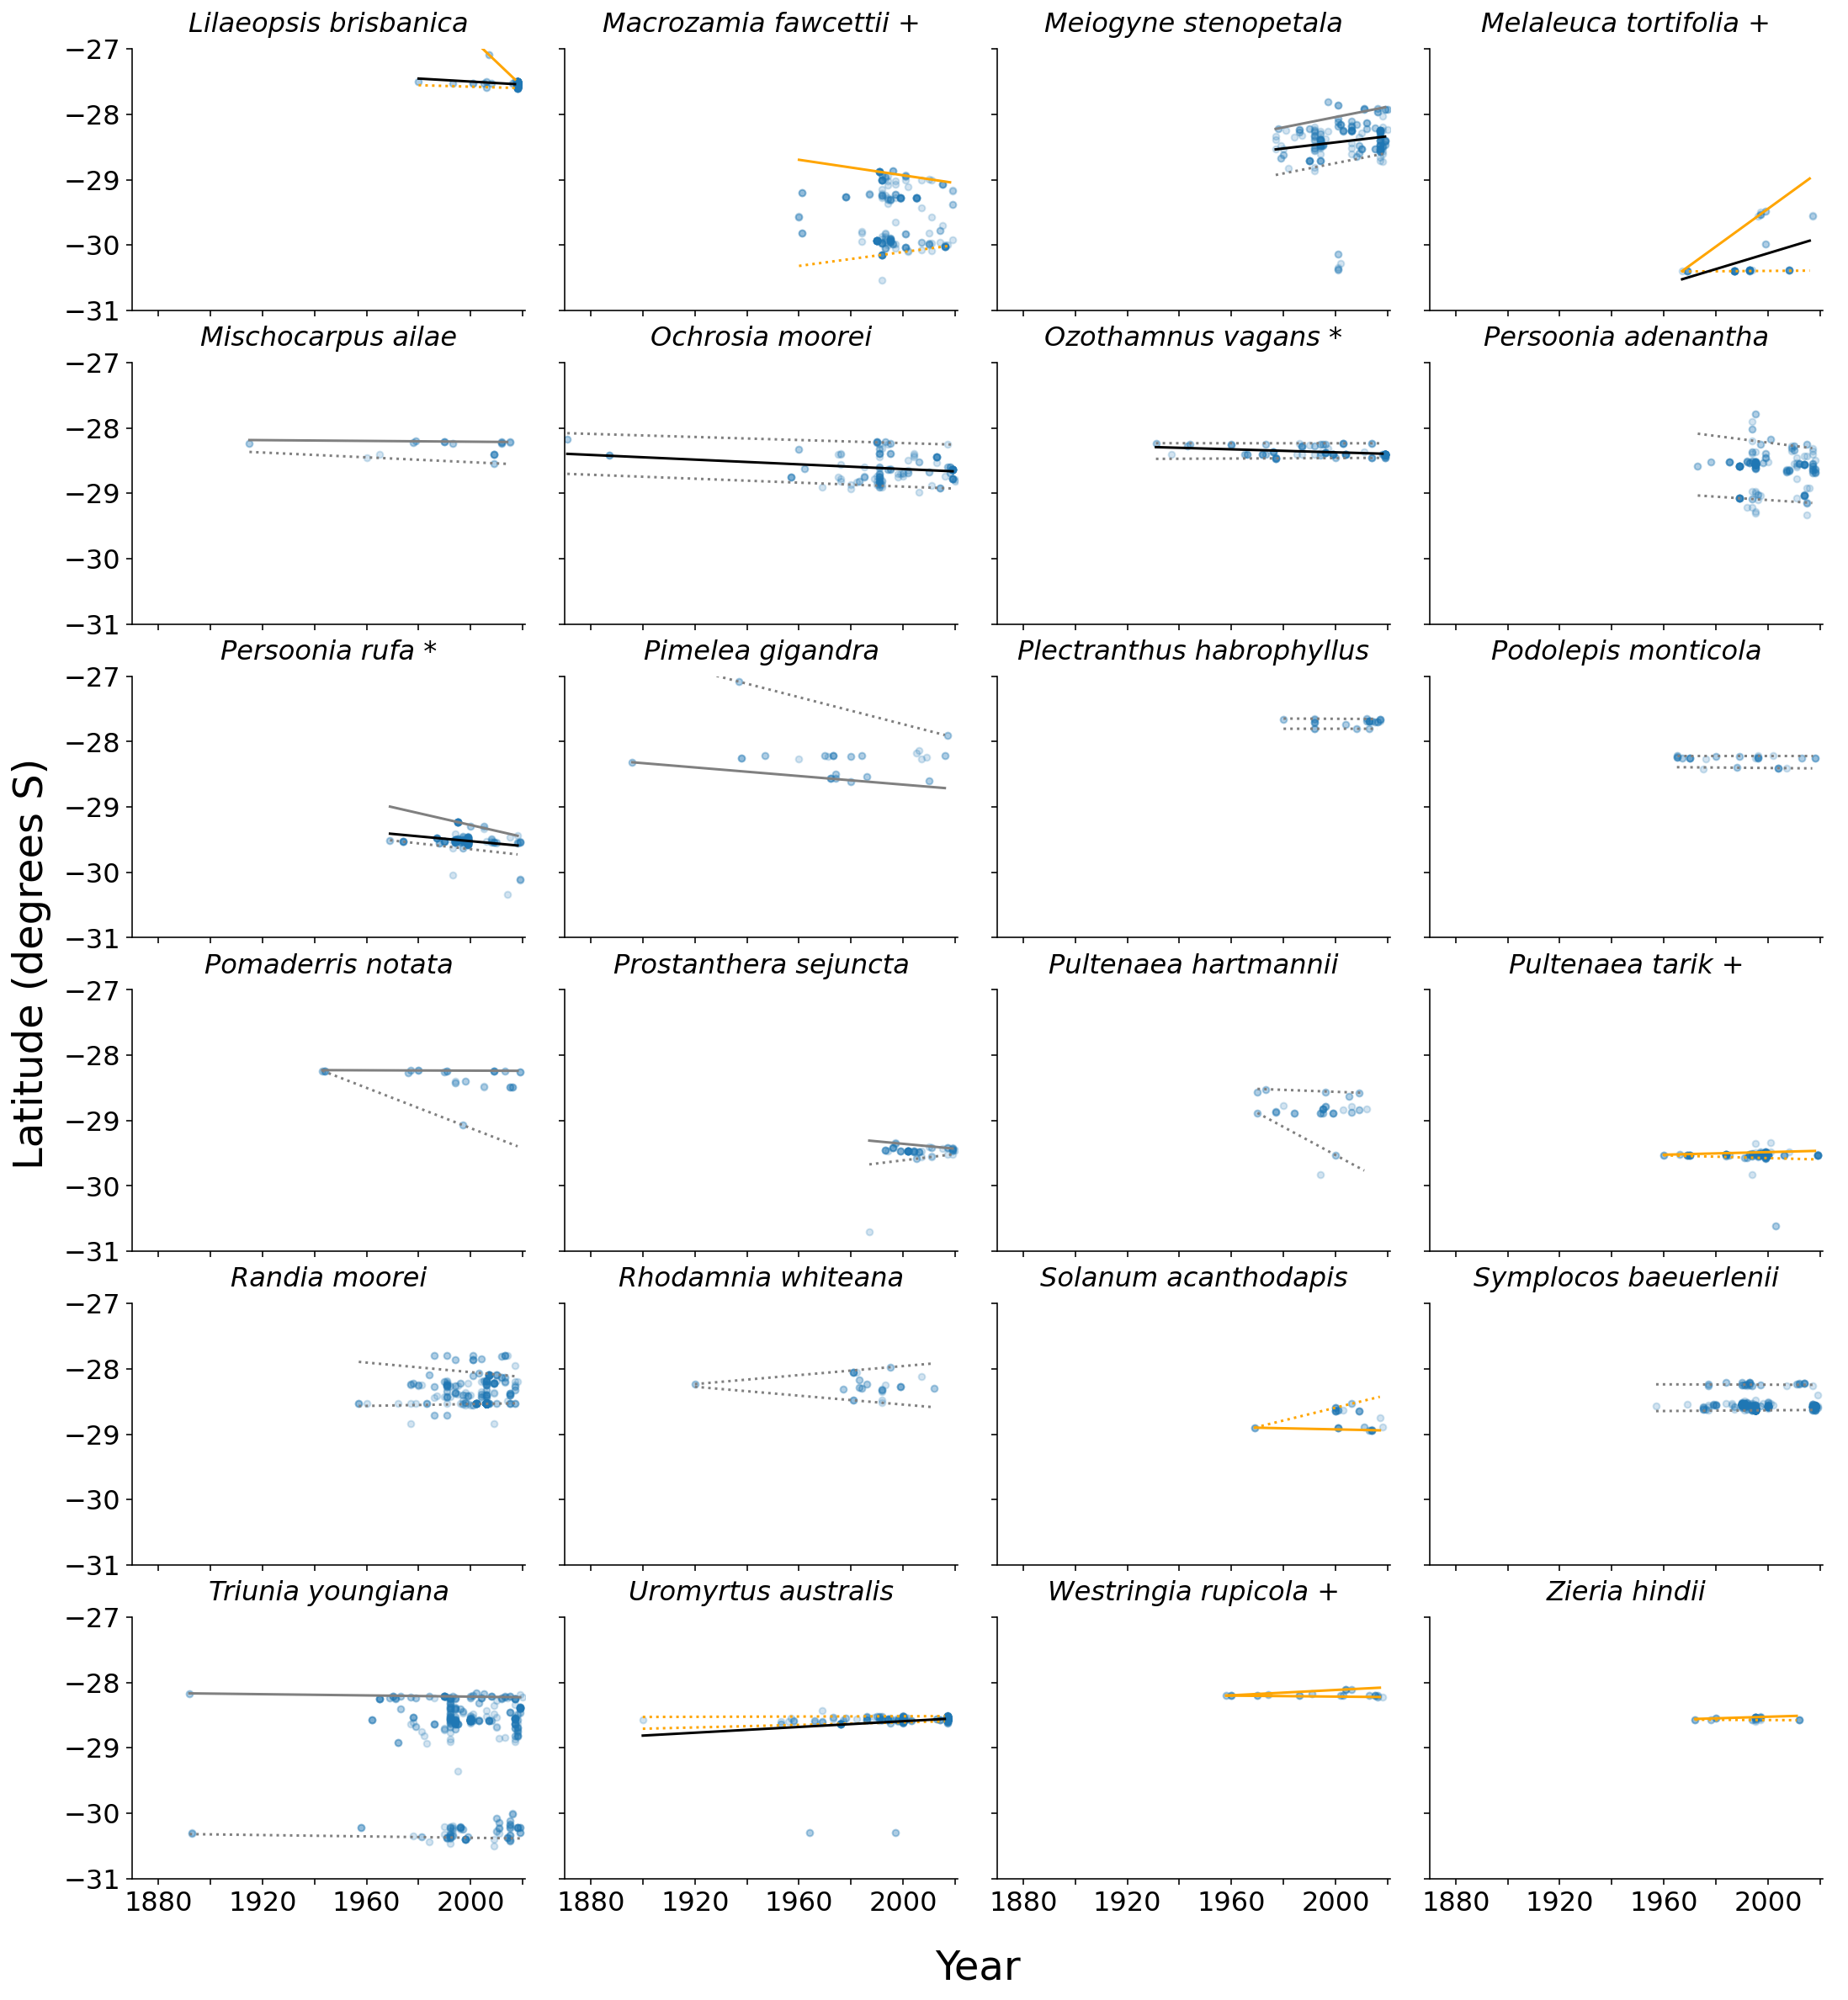

In [76]:
# makes big plot with subplots
fig, axes = plt.subplots(6,4, sharex=True, sharey=True, figsize=(18, 20))

plt.subplots_adjust(wspace=0.10, hspace=0.2)


# add invisible frame around big plot with axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Year", fontsize=24, labelpad=25)
plt.ylabel("Latitude (degrees S)", fontsize=24, labelpad=25)

# add smaller subplots by iteration
for i, ax in enumerate(axes.flatten(), start=48):
    
    try:
        species = databyspecies[i]
        
#         ax.xaxis.set_ticks(np.arange(1871, 2021, 30)
        
        # x and y axis number range
        ax.set_ylim([-31, -27])
        ax.set_xlim([1870, 2021])

        # remove the lines on the top and right sides of the subplots
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # makes axis numbers whole rather than decimal
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        
        # makes every second tick mark label on x axis invisible 
        for label in ax.xaxis.get_ticklabels()[::2]:
            label.set_visible(False)
            
        ax.tick_params(axis='both', which='major', labelsize=16)


        
        # define x values (earliest year of occurence for species to latest, in steps of 1)
        x = np.arange(databyspecies[i].Year.min(), databyspecies[i].Year.max(), 1)
        
        # define function to produce y values (y=mx+b)
        def get_y(b,m):
            return m*x+b

        # 5th percentile line
        if ((params.p_val_anova[i]<0.05) and (params.p5[i]<0.05)):
            y5 = get_y(params.coefs5_intercept[i], params.coefs5[i])
            ax.plot(x, y5, color='orange')
        elif params.p5[i]<0.05:
            y5 = get_y(params.coefs5_intercept[i], params.coefs5[i])
            ax.plot(x, y5, color='grey')
        elif params.p_val_anova[i]<0.05:
            y5 = get_y(params.coefs5_intercept[i], params.coefs5[i])
            ax.plot(x, y5, linestyle='dotted', color='orange')
        else:
            y5 = get_y(params.coefs5_intercept[i], params.coefs5[i])
            ax.plot(x, y5, linestyle='dotted', color='grey')

        # 95th percentile line
        if ((params.p_val_anova[i]<0.05) and (params.p95[i]<0.05)):
            y95 = get_y(params.coefs95_intercept[i], params.coefs95[i])
            ax.plot(x, y95, color='orange')
        elif params.p95[i]<0.05:
            y95 = get_y(params.coefs95_intercept[i], params.coefs95[i])
            ax.plot(x, y95, color='grey')
        elif params.p_val_anova[i]<0.05:
            y95 = get_y(params.coefs95_intercept[i], params.coefs95[i])
            ax.plot(x, y95, linestyle='dotted', color='orange')
        else:
            y95 = get_y(params.coefs95_intercept[i], params.coefs95[i])
            ax.plot(x, y95, linestyle='dotted', color='grey')

        # OLS regression line   
        if params.Year[i]<0.05:
            y = get_y(params.coefs_intercept[i], params.coefs_year[i])
            ax.plot(x, y, color='black')

        # Scatterplot 
        ax.scatter(species.Year, species.Latitude, alpha = 0.2, s=15)


#         else:
#             ax.set_title(' '.join(species.Species.unique()), fontsize=12, pad=3, style='italic');
        
    except:
        pass
        # Title (species name)
    title = databyspecies[i].Species.unique()[0]
    if params.holm_adjust_ols[i]<0.05:
        title = title +' *'
    if params.holm_adjust_anova[i]<0.05:
        title = title +' ^'
    if params.holm_adjust_5[i]<0.05:
        title = title +' ~'
    if params.holm_adjust_95[i]<0.05:
        title = title +' +'
    ax.set_title(label=title, fontsize=16, pad=10, style='italic')

In [77]:
fig.savefig('plot3.svg', format='svg', dpi=1200, pad_inches=0, bbox_inches='tight')

In [48]:
params

,Species,Intercept,Year,coefs_intercept,coefs_year,p5,p95,coefs5,coefs95,coefs5_intercept,coefs95_intercept,p_val_anova,holm_adjust_ols,holm_adjust_5,holm_adjust_95,holm_adjust_anova
0,Acacia baeuerlenii,1.669236e-06,1.941063e-03,-75.614719,0.023523,0.525461,0.317226,-0.002738,0.022170,-24.544339,-71.329150,0.000999,0.097053,1.000000,1.000000,0.071928
1,Acacia floydii,4.407802e-04,7.132008e-01,-26.454829,-0.001311,0.943484,0.044596,0.001625,-0.044168,-32.378700,59.717648,0.325674,1.000000,1.000000,1.000000,1.000000
2,Acacia macnuttiana,3.774612e-03,3.868752e-07,-10.243217,-0.009438,0.000143,0.057263,-0.023600,-0.000453,17.642000,-27.889496,0.000999,0.000025,0.009467,1.000000,0.071928
3,Acacia ruppii,4.717432e-69,1.292674e-03,-25.963158,-0.001716,0.124922,0.923848,0.000617,0.000358,-30.749917,-29.554552,0.919081,0.067219,1.000000,1.000000,1.000000
4,Acacia torringtonensis,1.134598e-23,8.075658e-01,-28.793402,-0.000263,0.495730,0.415366,-0.002527,0.005198,-24.540838,-39.219218,0.027972,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Symplocos baeuerlenii,2.657964e-162,3.049807e-01,-27.831191,-0.000364,0.261530,0.974917,0.000277,-0.000121,-29.187854,-28.000432,0.361638,1.000000,1.000000,1.000000,1.000000
68,Triunia youngiana,1.046196e-09,4.476045e-01,-25.766905,-0.001572,0.250491,0.038463,-0.000520,-0.000463,-29.336580,-27.290463,0.741259,1.000000,1.000000,1.000000,1.000000
69,Uromyrtus australis,1.188832e-73,1.175789e-03,-32.995809,0.002202,0.933493,0.497337,0.000979,0.000109,-30.567380,-28.735216,0.010989,0.062317,1.000000,1.000000,0.527473
70,Westringia rupicola,3.314607e-34,3.259310e-01,-28.755279,0.000286,0.002565,0.000000,-0.000374,0.002042,-27.468841,-32.197861,0.009990,1.000000,0.164179,0.000000,0.499500


In [49]:
# journal of biogeography
# annals of botany
# botanical journal of the malayan society
# global ecology and conservation

# get rid of lineson top of plots/move names down? *
# make dotted line non-significant quantiles and solid line significant quantiles *
# add * next to ones significant after holm adjustment *
# double check records are not from botanic gardens